# Step 1 - Data Exploration

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Reading the data

df_orders = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
df_products = pd.read_csv("/datasets/products.csv", sep=";")
df_order_products = pd.read_csv("/datasets/order_products.csv", sep=";")
df_aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
df_departments = pd.read_csv("/datasets/departments.csv", sep=";")

In [3]:
# Checking structure of DataFrame "Instacart_Orders"
display(df_orders.head())
print()
df_orders.info()
print()
print(df_orders[df_orders.duplicated()].count())
print()
print(df_orders["days_since_prior_order"].isna().sum())
print()
df_orders["days_since_prior_order"].value_counts().sort_index()
print()
df_orders.describe()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

order_id                  15
user_id                   15
order_number              15
order_dow                 15
order_hour_of_day         15
days_since_prior_order    13
dtype: int64

28819




,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [4]:
#  Checking structure of DataFrame "Products"
display(df_products.head())
print()
df_products.info()
print()
print(df_products["product_name"].isna().sum())
print()
print(df_products[df_products.duplicated()].count())
print()
df_products["product_name"].value_counts().sort_index()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

1258

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



#2 Coffee Filters                                                  1
#2 Cone White Coffee Filters                                       1
#2 Mechanical Pencils                                              1
#4 Natural Brown Coffee Filters                                    1
& Go! Hazelnut Spread + Pretzel Sticks                             1
                                                                  ..
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum    1
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum          1
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum             1
with a Splash of Mango Coconut Water                               1
with a Splash of Pineapple Coconut Water                           1
Name: product_name, Length: 48436, dtype: int64

In [5]:
#  Checking structure of DataFrame "Order_products"
display(df_order_products.head())
print()
df_order_products.info(show_counts=True)
print()
print(df_order_products[df_order_products.duplicated()].sum())
print()
print(df_order_products.value_counts())
print()
print(df_order_products.isna().sum())
print()
df_order_products.describe()


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

order_id  product_id  add_to_cart_order  reordered
4         10054       5.0                1            1
2277733   35233       5.0                1            1
2277734   15233       4.0                1            1
          11471       2.0                1            1
          6374        3.0                1            1
                                                     ..
1145037   26790       21.0     

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [6]:
#  Checking structure of DataFrame "Aisles"
display(df_aisles.head())
print()
df_aisles.info()
print()
print(df_aisles[df_aisles.duplicated()].sum())
print()
print(df_aisles.value_counts())
print()
print(df_aisles.isna().sum())


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

aisle_id    0.0
aisle       0.0
dtype: float64

aisle_id  aisle                     
1         prepared soups salads         1
85        food storage                  1
99        canned fruit applesauce       1
98        juice nectars                 1
97        baking supplies decor         1
                                       ..
40        dog food care                 1
39        seafood counter               1
38        frozen meals                  1
37        ice cream ice                 1
134       specialty wines champagnes    1
Length: 134, dtype: int64

aisle_id    0
aisle       0
dtype: int64


In [7]:
#  Checking structure of DataFrame "Departments"
display(df_departments.head())
print()
df_departments.info()
print()
print(df_departments[df_departments.duplicated()].count())
print()
print(df_departments.value_counts().sort_index())
print()
print(df_departments.isna().sum())


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

department_id    0
department       0
dtype: int64

department_id  department     
1              frozen             1
2              other              1
3              bakery             1
4              produce            1
5              alcohol            1
6              international      1
7              beverages          1
8              pets               1
9              dry goods pasta    1
10             bulk               1
11             personal care      1
12             meat seafood       1
13             pantry             1
14             breakfast          1
15             canned goods       1
16             dairy eggs         1
17        

## Conclusions

In the `instacart_orders` dataframe, we see that all data types are `int`, except for "days_since_prior_order," which is of type `float` and could be converted to `int`. There are 478,967 records in this dataset with 6 columns. The "days_since_prior_order" field has several zeros; however, this does not seem to be the same as a null value, as the customer could have placed an order today, making the days since the last order zero, which is a valid value. This dataset has 28,819 blank records in the "days_since_prior_order" column. There were 15 duplicate records identified in this dataset.

In the `products` dataframe, all data types are `int`, except for "product_name," which is of type `object` (string), which seems correct. There are 49,694 records in this dataset with 4 columns. This dataset has 1,258 null values in the "product_name" column. No duplicate records were found.

In the `order_products` dataframe, all data types are `int`, except for "add_to_cart_order," which is of type `float`. This seems strange since quantities are usually integers; it may be necessary to convert this to type `int`. There are 4,545,007 records in this dataset with 4 columns. This dataset has 836 blank records in the "add_to_cart_order" column. No duplicate records were found.

In the `aisles` dataframe, we have `int` data types for "aisle_id" and `object` (string) for "aisle," which makes sense. There are 134 records in this dataset with 2 columns. This dataset is complete, with no null or duplicate data.

In the `departments` dataframe, we have `int` data types for "department_id" and `object` (string) for "department," which makes sense. There are 21 records in this dataset with 2 columns. This dataset is complete, with no null or duplicate data.


# Step 2. Data Preparation / Pre Processing

## Plan of approach

As we have already verified the data types in all datasets, now, for each dataset, we will convert the data types that need conversion, remove duplicates, and fill empty values to prepare them for further analysis.

### DataFrame `instacart_orders`

In [8]:
# Checking for doubled orders
print(df_orders[df_orders.duplicated()].sum())
print()
print(df_orders["order_id"].value_counts())

order_id                  22748225.0
user_id                    1488252.0
order_number                   375.0
order_dow                       45.0
order_hour_of_day               30.0
days_since_prior_order         116.0
dtype: float64

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64


Conclusion: we found 15 orders that share the same "order_id." Interestingly, each duplication occurred only once, meaning there are 2 records when we should only have 1.

In [9]:
# Checking orders done at 2AM on Wednesdays
filtered_df_orders = df_orders[(df_orders["order_dow"] == 3) & (df_orders["order_hour_of_day"] == 2)]
display(filtered_df_orders.info())
display(filtered_df_orders.head(106))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB


None

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
400167,774488,66195,16,3,2,2.0
410100,2934579,105857,4,3,2,8.0
411408,1286742,183220,48,3,2,4.0
415163,2282673,86751,49,3,2,2.0


Conclusion: We have 106 orders made on wednesdays @ 2AM

In [10]:
# Removing doubled orders
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Checking for doubles again
print(df_orders[df_orders.duplicated()].sum())

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


In [12]:
# Checking IDs for doubled orders
print(df_orders["order_id"].value_counts())

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64


Conclusion: The df_orders DataFrame presented duplicate data that needed to be removed to allow for analysis. Now we can use this DataFrame to draw conclusions about order behavior.

### DataFrame `products`

In [13]:
# Checking for doubled products
print(df_products[df_products.duplicated()].sum())

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64


In [14]:
# Checking IDs of doubled products
print(df_products["product_id"].duplicated().sum())

0


In [15]:
# Checking the name of doubled products and converting to lower
df_products["product_name"].value_counts()
df_products["product_name"] = df_products["product_name"].str.lower()
df_doublename = df_products["product_name"].value_counts()
print(df_doublename)

green tea with ginseng and honey                   3
organic instant oatmeal light maple brown sugar    2
organic balsamic vinegar of modena                 2
cookies 'n cream ice cream                         2
american cheese slices                             2
                                                  ..
melatonin 5 mg tablets                             1
candles                                            1
gluten free  herb crusted fish fillet              1
candy cane                                         1
manhattan cherry chip ice cream                    1
Name: product_name, Length: 48332, dtype: int64


In [16]:
# Checking doubled product names that are not missing
df_doublename_notmissing = df_products[(df_products["product_name"].duplicated()) & (~df_products["product_name"].isna())]
display(df_doublename_notmissing)

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


Conclusion: We found no records of doubled products in any columns, but we did find 104 doubled product names

### DataFrame `departments`

In [17]:
# Checking for doubles
print(df_departments[df_departments.duplicated()].sum())

department_id    0.0
department       0.0
dtype: float64


In [18]:
# Checking for doubled department IDs
print(df_departments["department_id"].duplicated().sum())

0


Conclusion: We found no records of doubled departments

### DataFrame `aisles`

In [19]:
# Checking for doubled aisles
print(df_aisles[df_aisles.duplicated()].sum())

aisle_id    0.0
aisle       0.0
dtype: float64


In [20]:
# Checking for doubled Aisle IDs
print(df_aisles["aisle_id"].duplicated().sum())

0


Conclusion: We found no records of doubled aisles

### DataFrame `order_products`

In [21]:
# Checking for doubled order_products
print(df_order_products[df_order_products.duplicated()].sum())

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


In [22]:
# Checking for more complicated cases of doubled orders
complex_doubled = df_order_products[(df_order_products["order_id"].duplicated()) & (df_order_products["product_id"].duplicated())]

print(complex_doubled.shape)
print()
print(complex_doubled.head())
df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id'])].info()

(4072526, 4)

      order_id  product_id  add_to_cart_order  reordered
824     844425       39408               10.0          1
1303   2825714       44632               16.0          1
1723   2658937       15740               23.0          1
1837   1945917       19348                1.0          1
2013   1914624       46175               13.0          0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           0 non-null      int64  
 1   product_id         0 non-null      int64  
 2   add_to_cart_order  0 non-null      float64
 3   reordered          0 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 0.0 bytes


Conclusion: We do not have completely duplicate rows in the order_products dataset. A more complex case of duplication would be having more than one record with the same order_id and the same product_id. By using the "subset" parameter within .duplicated, the result was zero, meaning there are no cases of repeated order_id and product_id.

## Finding and removing null values

When checking for doubles, we found that we need to investigate null values on the following columns:

*	`'product_name'` on products.
*   `'days_since_prior_order'` orders.
*	`'add_to_cart_order'` on order_products.


### DataFrame `products`

In [23]:
# Checking nulls on 'product_name'
print(df_products["product_name"].isna().sum())
print()
print(df_products["product_name"].isna().value_counts())

1258

False    48436
True      1258
Name: product_name, dtype: int64


Conclusion: We have 1258 null values on "product_name"

In [24]:
# Checking if all null values for product name are associated with aisleID 100
df_aisle100_noname = df_products[(df_products["product_name"].isna()) & (df_products["aisle_id"] == 100)]

print(df_aisle100_noname)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Conclusion: Yes, 1258 product names are associated with aisleID 100

In [25]:
# Checking if all null values for product name are associated with departament ID 21?
df_dep21_noname = df_products[(df_products["product_name"].isna()) & (df_products["department_id"] == 21)]
print(df_dep21_noname)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Conclusion: Yes 1258 null product names are associated with department 21

In [26]:
# Checking what are aisleID 100 and departmentID 21 mean
print(df_aisles[df_aisles["aisle_id"] == 100]["aisle"])
print()
print(df_departments[df_departments["department_id"] == 21]["department"])

99    missing
Name: aisle, dtype: object

20    missing
Name: department, dtype: object


Conclusion: Aisle 100 is labeled as "missing," indicating that the product_id was associated with this aisle but no product_name was provided. It may be a business rule to associate all product_ids without a product_name to aisle 100 ("missing"). The same applies to department 21, also labeled as "missing" and with products without a product_name associated with it.

In [27]:
# Replacing null product names with 'Unknown'
df_products["product_name"] = df_products["product_name"].fillna("Unknown")
print(df_products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Conclusion: We identified a department (100) and an aisle (21) to which all 1,258 products without a product_name were associated. We then replaced the missing value with "Unknown" to make the dataset complete and without missing values in product_name.

### DataFrame `orders`

In [28]:
# Finding null values
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# Checking for null values for customers that are not making their first order
df_order_empty_notfirstorder = df_orders[(df_orders["order_number"] != 1)]
print(df_order_empty_notfirstorder.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Conclusion: We have 28,817 null values on column "days_since_prior_order", but none of them are associated with customers that are not placing their first order

### DataFrame `order_products`

In [30]:
# Checking for null values
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# Checking for min and max for "add_to_cart_order"
addcart_min = df_order_products["add_to_cart_order"].min()
addcart_max = df_order_products["add_to_cart_order"].max()
print("add_to_cart_order mínimo:",addcart_min)
print("add_to_cart_order máximo:",addcart_max)

add_to_cart_order mínimo: 1.0
add_to_cart_order máximo: 64.0


Conclusion: We have 836 records without "add_to_cart_order" information, the minimum is 1 and maximum is 64

In [32]:
# Saving all order IDs with at least one null value in 'add_to_cart_order'
orderid_no_add_to_cart_order = df_order_products[df_order_products["add_to_cart_order"].isna()]["order_id"]
print(orderid_no_add_to_cart_order)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# Checking if all orders with null values have more than 64 products
no_add_to_cart_order_isna64 = df_order_products[df_order_products["add_to_cart_order"].isna()]
no_add_to_cart_order_isna64 = no_add_to_cart_order_isna64.groupby("order_id")["product_id"].count()
print (no_add_to_cart_order_isna64.max())

63


Conclusion: We have 70 orders without add_to_carter_order information, none of them with mor ethan 64 items per orderpedido

In [34]:
# Replacing null values on 'add_to_cart_order' by 999 and converting to type "integer"
df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].fillna(999)
df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].astype("int")
print(df_order_products[df_order_products["add_to_cart_order"].isna()])
df_order_products.info(show_counts=True)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Conclusion:From 836 records without add_to_cart_order, none have more than 64 items per order. We have replaced nulls for 999 and converted to type integer

## Conclusions

It was necessary to perform data cleaning on the orders, products, and order_products DataFrames, converting data types, removing duplicates, and replacing missing values to make them complete and ready for analysis. Proceeding with the analysis without these treatments could produce incorrect or distorted information, or even prevent certain analyses from being performed.

# Etapa 3. Data Analysis

We will execute the following analysis:

1. Verify if the values in the columns 'order_hour_of_day' and 'order_dow' in the orders table make sense (i.e., the values in the 'order_hour_of_day' column range from 0 to 23 and those in 'order_dow' range from 0 to 6).
2. Create a chart showing how many people place orders at each hour of the day.
3. Create a chart showing on which day of the week people make purchases.
4. Create a chart showing how long people wait until placing their next order and comment on the minimum and maximum values.

In [35]:
df_orders["order_hour_of_day"].value_counts().sort_index()

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [36]:
df_orders["order_dow"].value_counts().sort_index()

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Conclusion: Yes, the data seems to make sense because the column with the hour of the day ranges from 0 to 23, the column with the day of the week ranges from 0 to 6, and the data type is int in both cases.

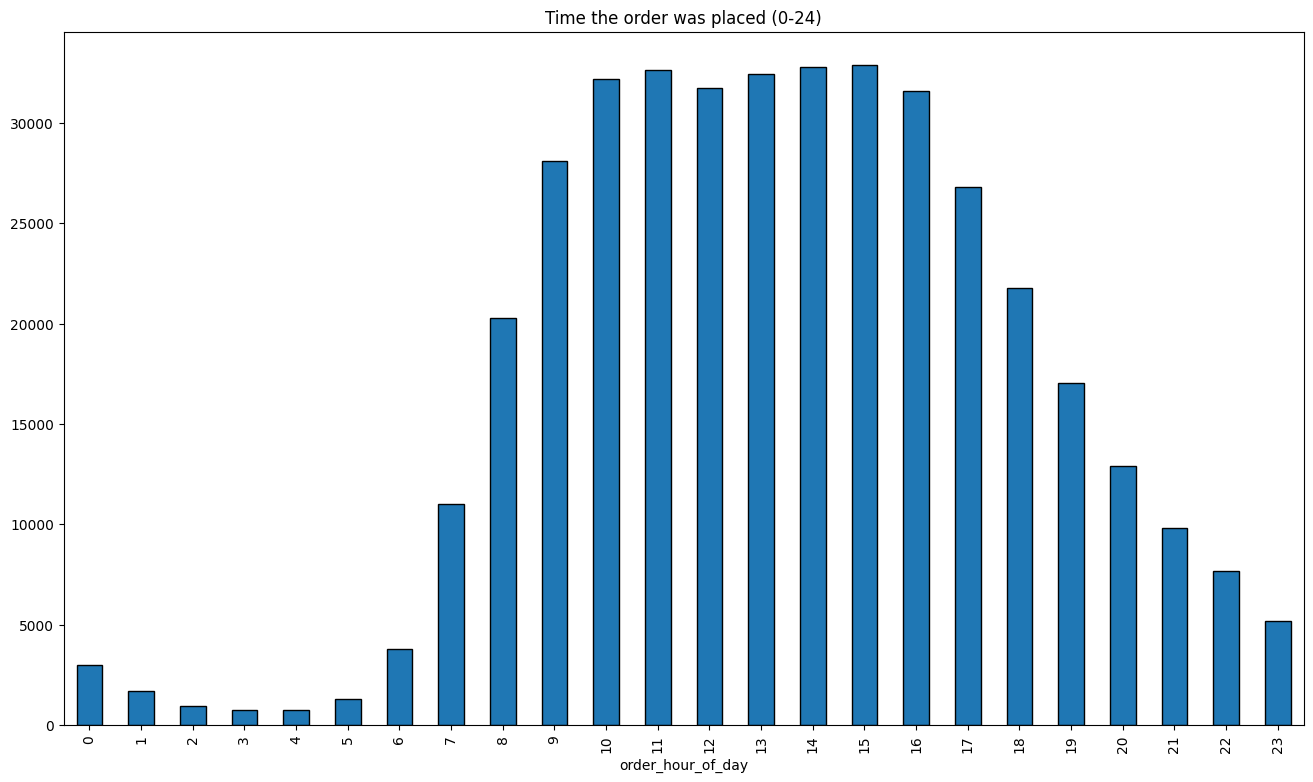

In [37]:
df_orders.groupby("order_hour_of_day")["user_id"].nunique().plot(
    kind="bar",
    edgecolor="black",
    title="Time the order was placed (0-24)",
    figsize=[16,9]
)

plt.show()



Conclusion: The peak of orders occurs between 10 and 11 a.m., followed by 2 to 3 p.m. The period with the most orders is between 10 a.m. and 5 p.m.

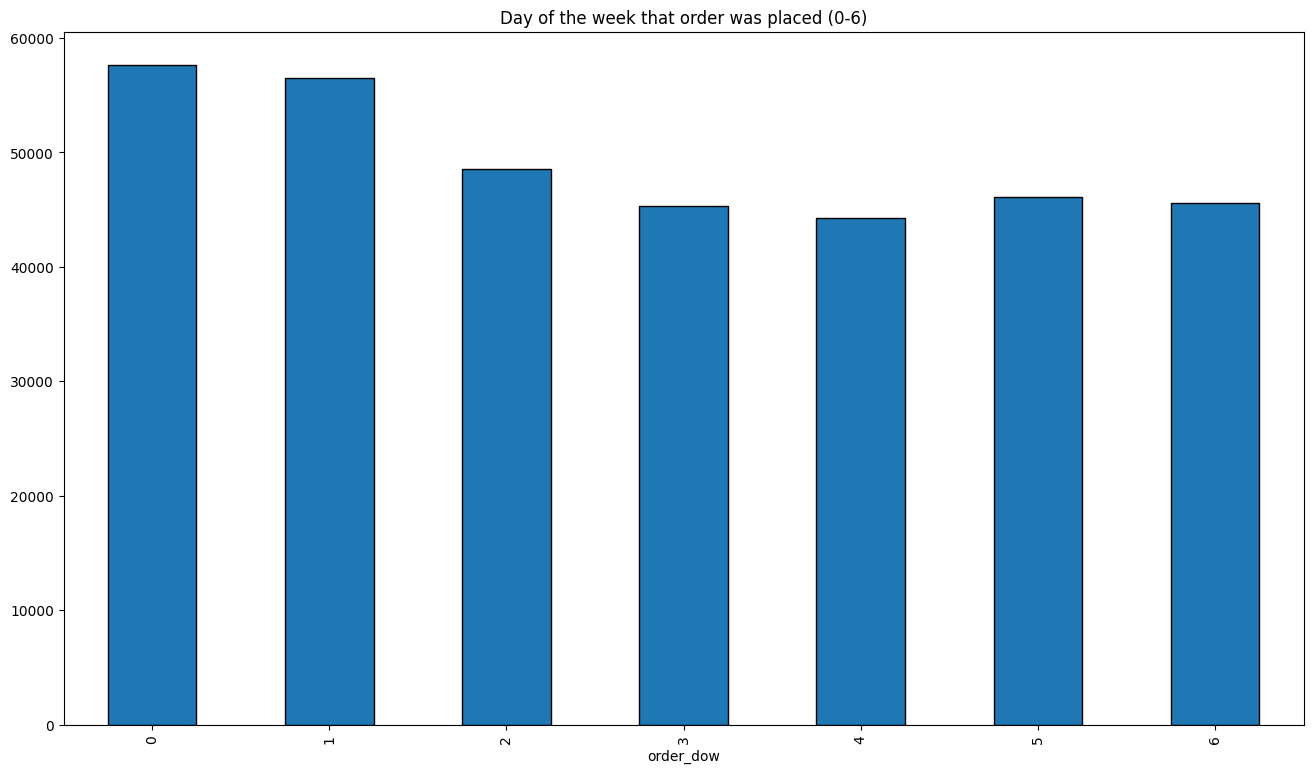

In [38]:
df_orders.groupby("order_dow")["user_id"].nunique().plot(
    kind="bar",
    edgecolor="black",
    title="Day of the week that order was placed (0-6)",
    figsize=[16,9]
)
plt.show()

Conclusion: The days of the week with most orders are sunday and monday

11.101813900274362


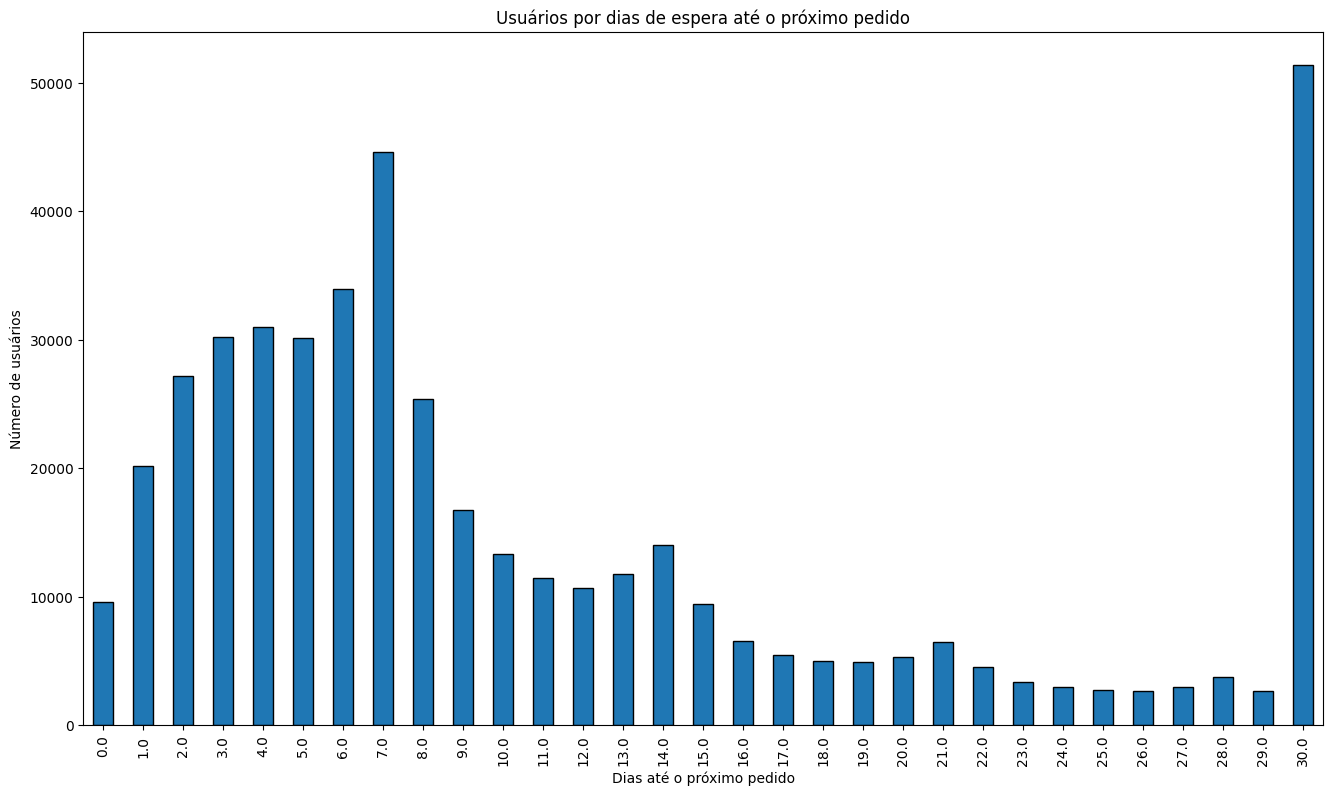

In [39]:
avg_reorder = df_orders["days_since_prior_order"].mean()
print(avg_reorder)

time_to_order = df_orders.groupby("days_since_prior_order")["user_id"].count()
time_to_order.plot(
    kind="bar",
    edgecolor="black",
    title="Users x days until next order",
    figsize=[16,9],
    ylabel="Number of users",
    xlabel="Days until next order"
)
plt.show()

Conclusion: People take 11 days on average between orders, most orders take place every 30 days, followed by orders every 7 days

We will execute the following analysis:

1. Is there any difference in the distributions of 'order_hour_of_day' on Wednesdays and Saturdays? Create bar charts for both days on the same graph and describe the differences you notice.
2. Build a distribution chart for the number of orders that customers make (i.e., how many customers placed only 1 order, how many placed only 2, how many placed only 3, etc.).
3. What are the 20 most frequently purchased products? Display the IDs and names.

order_dow             0     1     2     3     4     5     6
order_hour_of_day                                          
0                   533   565   462   373   324   459   464
1                   337   269   240   215   229   219   254
2                   188   145   136   106   114   123   177
3                   128   104   104   101   109    99   125
4                   108   104   109   108   100   118   118
5                   171   246   196   170   198   229   161
6                   463   757   653   643   594   654   451
7                  1752  2320  1900  1732  1787  1933  1619
8                  3908  4751  3485  3125  3136  3373  3246
9                  5650  7262  5057  4490  4332  4794  4311
10                 6978  7881  5489  5026  4938  5347  4919
11                 7186  7194  5365  5004  4842  5325  5116
12                 7231  6648  5066  4688  4433  4836  5132
13                 7483  6618  5234  4674  4567  5108  5323
14                 7533  6545  5344  477

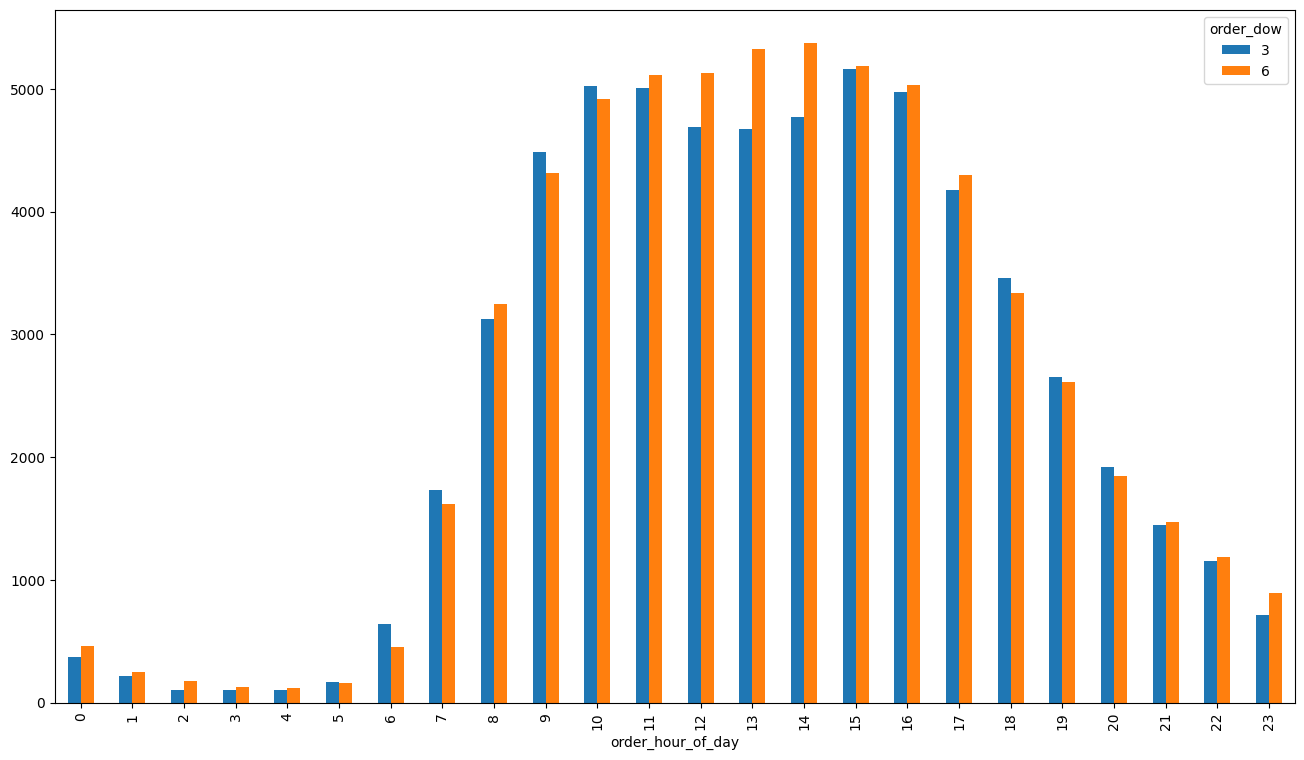

In [40]:
df_orders_pivot = df_orders.pivot_table(
    index="order_hour_of_day",
    columns="order_dow",
    values="order_id",
    aggfunc="count"
)
print(df_orders_pivot)
df_orders_pivot.plot(
    kind="bar",
    y=[3,6],
    figsize=[16,9]
)
plt.xticks(range(0, 24, 1))
plt.show()

Conclusion: We can observe similar behavior in terms of the number of orders on Wednesdays and Saturdays, with a slightly higher number of orders on Saturdays between 12 and 2 p.m.

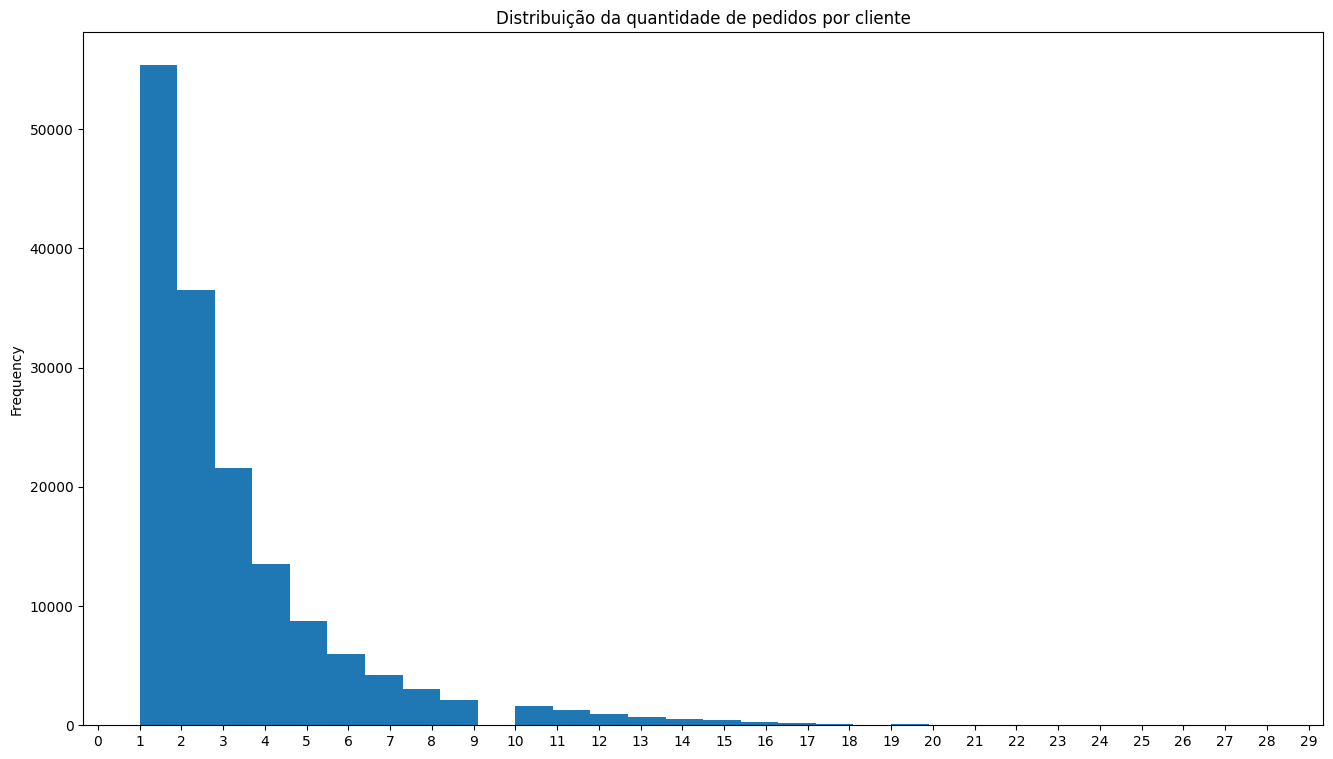

In [41]:
order_count_per_user = df_orders.groupby(['user_id'])['order_id'].count().sort_values()
order_count_per_user.plot(
    kind="hist",
    bins=30,
    title="Distribution of orders per customer",
    xlabel="Amount of orders per customer",
    figsize=[16,9]
)
plt.xticks(range(0,30,1))
plt.show()

Conclusion: The majority of customers places between 1 and 5 orders and most have placed only 1 order

In [42]:
product_names = df_products.groupby("product_id")["product_name"].sum()
print(product_names.head(10))
print()
top20_products = df_order_products.groupby("product_id")["order_id"].count()
print(top20_products)
df_concat = pd.concat([product_names,top20_products], axis="columns")
print(df_concat)
print()
df_concat.columns = ["product_name","quantity_sold"]
sorted_df_concat = df_concat.sort_values("quantity_sold",ascending=False)
print(sorted_df_concat.head(20))

product_id
1                            chocolate sandwich cookies
2                                      all-seasons salt
3                  robust golden unsweetened oolong tea
4     smart ones classic favorites mini rigatoni wit...
5                             green chile anytime sauce
6                                          dry nose oil
7                        pure coconut water with orange
8                     cut russet potatoes steam n' mash
9                     light strawberry blueberry yogurt
10       sparkling orange juice & prickly pear beverage
Name: product_name, dtype: object

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64
                                                 product_name  order_id
product_id                                                             
1                                  chocolate sandwic

Conclusion: The 20 best-selling products were sold 11,781 times or more, and all of them are food items such as vegetables, fruits, milk, etc. The top-selling product was bananas, with 66,050 sales.

Now we will run the following analysis

1. How many items do people usually buy in an order? What does the distribution look like?
2. What are the 20 most frequently included items in repeat orders? Display the IDs and names.
3. For each product, what proportion of its orders are repeat purchases? Create a table with columns for the product ID, name, and the proportion of repeat orders.
4. For each customer, what proportion of all their orders are repeat purchases?
5. What are the 20 items that people most often add to their carts first? Display the product ID, name, and the number of times it was the first item added to a cart.

count    4.545007e+06
mean     8.533887e+00
std      1.518562e+01
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      9.990000e+02
Name: add_to_cart_order, dtype: float64


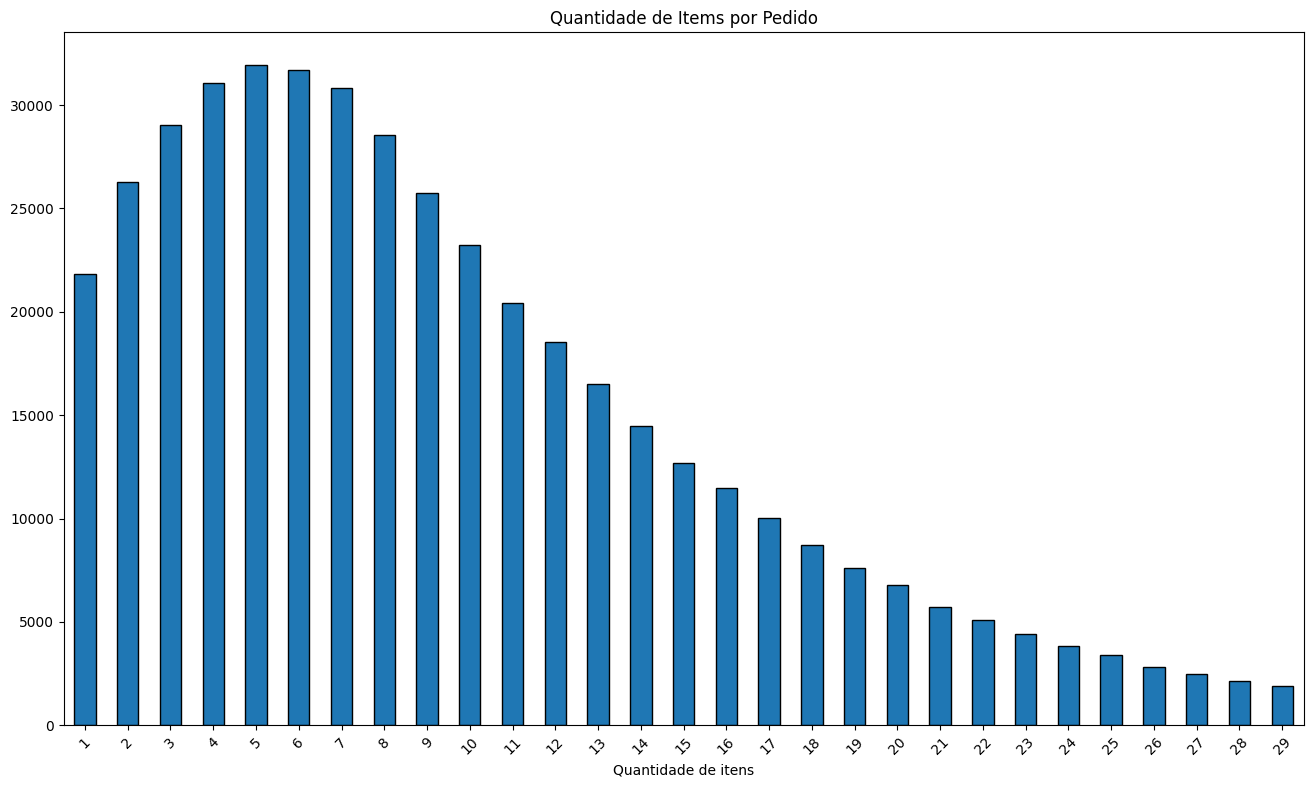

In [43]:
print(df_order_products["add_to_cart_order"].describe())

num_items = df_order_products.groupby('order_id')['product_id'].count()
barchart_vals = num_items[num_items<30].value_counts().sort_index().plot(
    kind="bar",
    xlim=30,
    edgecolor="black",
    rot=45,
    figsize=[16,9],
    title="Number of items per order",
    xlabel="Quantity of items"
)

Conclusion: People usually order between 3 and 8 items. The median is 6 and the average is 9 items per order. We have identified an order with 999 items, which seems strange and distorts the average. So we have filtered this outlier out.

In [44]:
top20_reorder = df_order_products[df_order_products["reordered"] == 1]
top20_reorder = top20_reorder.groupby("product_id")["product_id"].count()
print(top20_reorder)
df_concat2 = pd.concat([product_names,top20_reorder], axis="columns")
print(df_concat2)
df_concat2.columns = ["product_name","quantity_sold"]
sorted_df_concat2 = df_concat2.sort_values("quantity_sold",ascending=False)
display(sorted_df_concat2.head(20))

product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: product_id, Length: 36228, dtype: int64
                                                 product_name  product_id
product_id                                                               
1                                  chocolate sandwich cookies       158.0
2                                            all-seasons salt         NaN
3                        robust golden unsweetened oolong tea        31.0
4           smart ones classic favorites mini rigatoni wit...        25.0
5                                   green chile anytime sauce         NaN
...                                                       ...         ...
49690                           high performance energy drink         4.0
49691                           original pancake & waffle mix        31.0
49692         organic instant oatmeal light maple brown suga

,product_name,quantity_sold
product_id,,
24852,banana,55763.0
13176,bag of organic bananas,44450.0
21137,organic strawberries,28639.0
21903,organic baby spinach,26233.0
47209,organic hass avocado,23629.0
47766,organic avocado,18743.0
27845,organic whole milk,16251.0
47626,large lemon,15044.0
27966,organic raspberries,14748.0


In [45]:
merged_top20 = sorted_df_concat.merge(
    sorted_df_concat2,
    on="product_id",
    how="inner",
    suffixes=["_top20","_top20_recompra"]
)
merged_top20 = merged_top20.drop("product_name_top20_recompra", axis="columns")
display(merged_top20.head(20))

,product_name_top20,quantity_sold_top20,quantity_sold_top20_recompra
product_id,,,
24852,banana,66050.0,55763.0
13176,bag of organic bananas,53297.0,44450.0
21137,organic strawberries,37039.0,28639.0
21903,organic baby spinach,33971.0,26233.0
47209,organic hass avocado,29773.0,23629.0
47766,organic avocado,24689.0,18743.0
47626,large lemon,21495.0,15044.0
16797,strawberries,20018.0,13945.0
26209,limes,19690.0,13327.0


Conclusions:
- The top20 products and top20 repurchase are pretty similar. Top20 repurchase has less quantity sold than top20. The top 6 items on both groups are the same.
- All products from top20 repurchase are vegetables, fruits and milk
- The list above shows common items between top20 and top20 repurchase and their quantities


In [46]:
order_products_pivot = df_order_products.pivot_table(
    index="product_id",
    columns="reordered",
    values="order_id",
    aggfunc="count",
)
order_products_pivot["total_reordered_%"] = order_products_pivot[1] / (order_products_pivot[0] + order_products_pivot[1])
concat_reordered = pd.concat([product_names,order_products_pivot], axis="columns")
concat_reordered = concat_reordered.sort_values("total_reordered_%",ascending=False)
concat_reordered.columns = ["product_name","qty_1st_order","qty_reordered","%_reordered"]
display(concat_reordered.head(60))

,product_name,qty_1st_order,qty_reordered,%_reordered
product_id,,,,
10236,fragrance free clay with natural odor eliminat...,1.0,20.0,0.952381
5470,tequila reposado,1.0,18.0,0.947368
8867,artisan multigrain bread,1.0,17.0,0.944444
20783,super detox acai noni goji,1.0,17.0,0.944444
27041,mushroom stems & pieces,1.0,15.0,0.937500
22049,organic blue corn tortila chips,1.0,14.0,0.933333
8428,fresh squeezed ipa,1.0,14.0,0.933333
13240,licorice- twists- black,1.0,13.0,0.928571
45523,dark 83% pure dark chocolate bite,1.0,13.0,0.928571


Conclusions:
- There are 56 products with over 90% reorder factor
- Most of these products had only one sale on the first order, all others are repurchases

In [47]:
df_userid_orderid = df_orders.loc[:,["order_id","user_id"]]
df_repeat_order = df_order_products.merge(
    df_userid_orderid,
    on="order_id",
    how="left"
)

repeat_order_pivot = df_repeat_order.pivot_table(
    index="user_id",
    columns="reordered",
    values="order_id",
    aggfunc="count"
)

repeat_order_pivot["%_reordered"] = repeat_order_pivot[1] / (repeat_order_pivot[0] + repeat_order_pivot[1])
# repeat_order_pivot = repeat_order_pivot.sort_values("%_reordered",ascending=False)
repeat_order_pivot = repeat_order_pivot.sort_values("user_id")
repeat_order_pivot.columns = ["qty_1st_order","qty_reordered","%_reordered"]
display(repeat_order_pivot.head(60))

,qty_1st_order,qty_reordered,%_reordered
user_id,,,
2,25.0,1.0,0.038462
4,2.0,NaN,NaN
5,4.0,8.0,0.666667
6,4.0,NaN,NaN
7,1.0,13.0,0.928571
11,12.0,3.0,0.200000
12,9.0,3.0,0.250000
13,10.0,13.0,0.565217
14,39.0,22.0,0.360656


Conclusions:
- 58 customers have over 98% reorder factor
- Most of these customers had a single sale as first order, all others are repurchase

In [79]:

df_top20cart = df_order_products[df_order_products["add_to_cart_order"] == 1]
# print(df_top20cart.head(50))
# df_top20cart = df_top20cart.groupby("product_id").value_counts()
df_top20cart_pivot = df_top20cart.pivot_table(
     index="product_id",  
     values="add_to_cart_order",
     aggfunc="count"
)
df_top20cart_pivot = df_top20cart_pivot.sort_values("add_to_cart_order",ascending=False).head(50)
# print(df_top20cart_pivot.head(20))
df_top20cart_merged = df_top20cart_pivot.merge(
    product_names,
    left_on="product_id",
    right_on="product_id",
    how="left"
)
df_top20cart_merged.columns=["count","product_name"]
df_top20cart_merged = df_top20cart_merged[["product_name","count"]]
display(df_top20cart_merged.head(20))

,product_name,count
product_id,,
24852,banana,15562
13176,bag of organic bananas,11026
27845,organic whole milk,4363
21137,organic strawberries,3946
47209,organic hass avocado,3390
21903,organic baby spinach,3336
47766,organic avocado,3044
19660,spring water,2336
16797,strawberries,2308


# General Conclusion of the Project

Observações gerais:

We observe a type of business where there is a high rate of repurchase of the same products,
as well as these products being the first ones placed in the customers' carts.

The data needed to be processed in the orders, products, and order_products dataframes so that the analysis could be carried out.

Customers:
Despite most customers buying between 6 to 9 items per order and making on average 1 to 5 orders,
we see a high repurchase rate, especially in the categories of vegetables, fruits, and milk.

People take an average of 11 days between one order and another, so from the 12th day, if the customer hasn't made a purchase yet,
we can approach them with a marketing action to stimulate the purchase. Most orders are placed every 30 days, followed by every 7 days.

We should concentrate marketing efforts on customers with a repurchase rate above 90% (for instance)
to ensure revenue stability in the future. We must not lose these customers to the competition at all costs.

We have a select group of customers (58) who had a repurchase rate above 98%, and these are the most important.

Products:
There are 56 products for which the percentage of repeated orders is above 90%. These products must never run out of stock.

The top 20 best-selling products sold 11,781 times or more.

The top 20 products, top 20 repurchased products, and the first 20 products placed in carts are practically the same.

There are some products associated with aisle 21 (missing) and department 100 (missing) that need to be
categorized by aisle and department.

Orders:
The days of the week with the most orders are Sunday and Monday, so we should focus our marketing efforts on these days.

On Wednesdays and Saturdays, we have the opportunity to increase sales by launching marketing actions from 9 AM to 5 PM,
when we have the highest volume of orders.

Overall, the peak order times are between 10 and 11 AM, followed by 2 to 3 PM.

The period with the most orders is between 10 AM and 5 PM.



